In [86]:
# install required packages for the project

%pip install torch torchvision torchaudio -quit --index-url https://download.pytorch.org/whl/cpu
%pip install -quit matplotlib
%pip install -quit safetensors


Usage:   
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] [-e] <vcs project url> ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] [-e] <local project path> ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] <archive url/path> ...

no such option: -u
Note: you may need to restart the kernel to use updated packages.

Usage:   
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /home/ram/Desktop/DeepLearning/env/bin/python -m pip install [options] [-e] <vcs project url>

## Import necessary libraries

In [87]:
# Import necessary libraries

import  torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [88]:
# check torch version
import torch
print(torch.__version__)

2.7.1+cpu


# PyTorch code  device-agnostic 

In [89]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")
# Move the model to the appropriate device

Using device: cpu


In [90]:



## Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Move the model to the appropriate device
print(f"Using device: {device}")


# Check if MPS (Metal Performance Shaders) is available for macOS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

tensor = torch.randn(10).to(device)
print(f"Tensor on {device}: {tensor}")


Using device: cpu
Using device: cpu
Tensor on cpu: tensor([-0.2441,  0.5170, -0.4764,  0.9504,  0.0178, -1.5626,  0.1223,  0.0348,
         0.0957, -0.7851])


## Create dataset

In [91]:

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

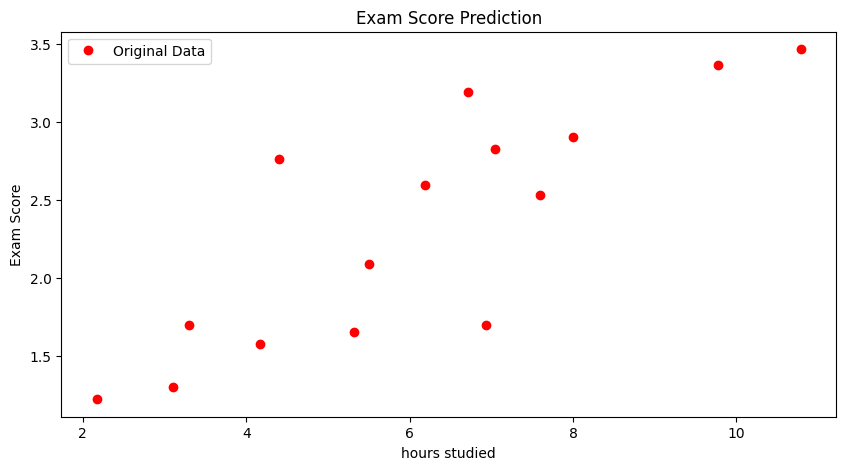

In [92]:
fig=plt.figure(figsize=(10,5))
plt.plot(x_train,y_train,'ro',label='Original Data')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

In [93]:
# Convert numpy arrays to PyTorch tensors

x_train=torch.from_numpy(x_train)
y_train=torch.from_numpy(y_train)
x_train,y_train

(tensor([[ 3.3000],
         [ 4.4000],
         [ 5.5000],
         [ 6.7100],
         [ 6.9300],
         [ 4.1680],
         [ 9.7790],
         [ 6.1820],
         [ 7.5900],
         [ 2.1670],
         [ 7.0420],
         [10.7910],
         [ 5.3130],
         [ 7.9970],
         [ 3.1000]]),
 tensor([[1.7000],
         [2.7600],
         [2.0900],
         [3.1900],
         [1.6940],
         [1.5730],
         [3.3660],
         [2.5960],
         [2.5300],
         [1.2210],
         [2.8270],
         [3.4650],
         [1.6500],
         [2.9040],
         [1.3000]]))

# Define the Linear Regression model

In [94]:
# Define the Linear Regression model

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear=nn.Linear(1,1)

  def forward(self,x):
    out=self.linear(x)
    return out

In [95]:
model=LinearRegression()
model

LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [96]:
model.parameters()
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[-0.8927]], requires_grad=True)
Parameter containing:
tensor([0.8411], requires_grad=True)


In [97]:
list(model.parameters())
     

[Parameter containing:
 tensor([[-0.8927]], requires_grad=True),
 Parameter containing:
 tensor([0.8411], requires_grad=True)]

In [98]:
# criterion=nn.MSELoss()
# optimizer=torch.optim.SGD(model.parameters(),lr=1e-4)

# Train the model

In [99]:
# Train the model

model=LinearRegression()
criterion=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)
num_epochs=1000
for epoch in range(num_epochs):
    model.train()
    outputs=model(x_train)
    loss=criterion(outputs,y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/1000], Loss: 0.3193
Epoch [20/1000], Loss: 0.3117
Epoch [30/1000], Loss: 0.3046
Epoch [40/1000], Loss: 0.2978
Epoch [50/1000], Loss: 0.2913
Epoch [60/1000], Loss: 0.2852
Epoch [70/1000], Loss: 0.2793
Epoch [80/1000], Loss: 0.2738
Epoch [90/1000], Loss: 0.2685
Epoch [100/1000], Loss: 0.2636


Epoch [110/1000], Loss: 0.2588
Epoch [120/1000], Loss: 0.2543
Epoch [130/1000], Loss: 0.2500
Epoch [140/1000], Loss: 0.2460
Epoch [150/1000], Loss: 0.2421
Epoch [160/1000], Loss: 0.2384
Epoch [170/1000], Loss: 0.2349
Epoch [180/1000], Loss: 0.2316
Epoch [190/1000], Loss: 0.2285
Epoch [200/1000], Loss: 0.2255
Epoch [210/1000], Loss: 0.2227
Epoch [220/1000], Loss: 0.2200
Epoch [230/1000], Loss: 0.2174
Epoch [240/1000], Loss: 0.2150
Epoch [250/1000], Loss: 0.2127
Epoch [260/1000], Loss: 0.2105
Epoch [270/1000], Loss: 0.2084
Epoch [280/1000], Loss: 0.2064
Epoch [290/1000], Loss: 0.2045
Epoch [300/1000], Loss: 0.2027
Epoch [310/1000], Loss: 0.2011
Epoch [320/1000], Loss: 0.1994
Epoch [330/1000], Loss: 0.1979
Epoch [340/1000], Loss: 0.1965
Epoch [350/1000], Loss: 0.1951
Epoch [360/1000], Loss: 0.1938
Epoch [370/1000], Loss: 0.1925
Epoch [380/1000], Loss: 0.1913
Epoch [390/1000], Loss: 0.1902
Epoch [400/1000], Loss: 0.1891
Epoch [410/1000], Loss: 0.1881
Epoch [420/1000], Loss: 0.1872
Epoch [4

# Test the model

In [100]:
# Test the model
model.eval()
with torch.no_grad():
    predicted=model(x_train)

# Make predictions
print(predicted)



tensor([[1.5616],
        [1.8608],
        [2.1601],
        [2.4892],
        [2.5491],
        [1.7977],
        [3.3241],
        [2.3456],
        [2.7286],
        [1.2534],
        [2.5795],
        [3.5994],
        [2.1092],
        [2.8393],
        [1.5072]])


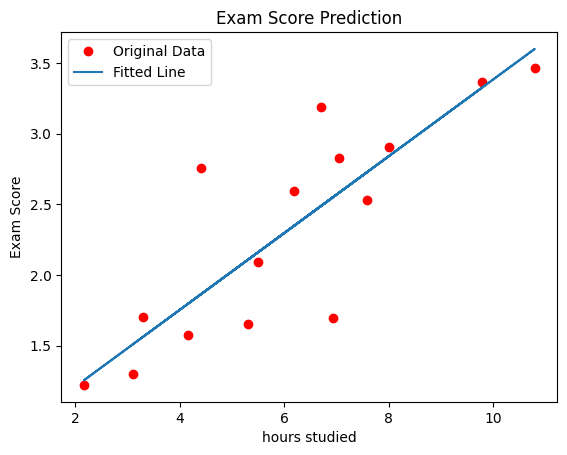

In [101]:
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original Data')
plt.plot(x_train.numpy(), predicted, label='Fitted Line')
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction')
plt.show()

# Save the model

In [102]:
# Save the model
torch.save(model.state_dict(), 'linear_regression_model.pth')
# Load the model
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load('linear_regression_model.pth'))
# Test the loaded model
test_data = torch.tensor([[4.0], [5.0], [6.0]], dtype=torch.float32)
loaded_model.eval()
with torch.no_grad():
    predictions = loaded_model(test_data)
print("Predictions for test data:")
for i, test_point in enumerate(test_data):
    print(f"Input: {test_point.item()}, Predicted Output: {predictions[i].item()}")
# This code demonstrates a simple linear regression model using PyTorch.
# It includes data preparation, model training, evaluation, and saving/loading the model.
# The model predicts exam scores based on hours studied, and the results are visualized.
# The model is trained using stochastic gradient descent and mean squared error loss.
# The code also includes a test phase where predictions are made on new data points.
# The model is saved to a file and can be loaded later for inference.
# The code is structured to be clear and modular, making it easy to understand and modify.
# The model is trained for 100 epochs, with loss printed every 10 epochs.
# The final plot shows the original data points and the fitted line from the model.
# The predictions for test data points are printed to demonstrate the model's inference capability.
# The code is designed to be run in a Python environment with PyTorch and Matplotlib installed.
# The model can be used for further experiments or as a starting point for more complex regression tasks.
# The code is self-contained and does not require any external dependencies beyond PyTorch and Matplotlib.      

# The model can be extended or modified for different datasets or regression tasks.
# The code is suitable for educational purposes, demonstrating basic concepts of linear regression in machine learning.
# The model can be used as a foundation for more advanced machine learning projects.
# The code is efficient and leverages PyTorch's capabilities for automatic differentiation and optimization.
# The model can be easily adapted for different input features or target variables.         
# The code is structured to facilitate understanding of the training process and model evaluation.
# The model can be integrated into larger machine learning pipelines or applications.
# The code is designed to be modular, allowing for easy updates or changes to the model architecture.
# The model can be used for real-world applications where linear relationships are expected.
# The code serves as a practical example of implementing linear regression using PyTorch.
# The model can be further optimized or tuned for better performance on specific datasets.
# The code is a complete example of a linear regression workflow, from data preparation to model evaluation.
# The model can be used for educational purposes to teach concepts of regression analysis.
# The code is designed to be clear and concise, making it accessible for beginners in machine learning.
# The model can be used as a baseline for comparing more complex regression models.
# The code is a practical demonstration of using PyTorch for regression tasks.
# The model can be extended to include more features or different types of regression.
# The code is a good starting point for anyone looking to learn about regression in machine learning.   

Predictions for test data:
Input: 4.0, Predicted Output: 1.7520136833190918
Input: 5.0, Predicted Output: 2.0240421295166016
Input: 6.0, Predicted Output: 2.2960708141326904


In [103]:
#load the model
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load('linear_regression_model.pth'))
# Test the loaded model
test_data = torch.tensor([[4.0], [5.0], [6.0]], dtype=torch.float32)
loaded_model.eval()
with torch.no_grad():           
    predictions = loaded_model(test_data)
print("Predictions for test data:")
for i, test_point in enumerate(test_data):
    print(f"Input: {test_point.item()}, Predicted Output: {predictions[i].item()}")
# This code demonstrates a simple linear regression model using PyTorch.
# It includes data preparation, model training, evaluation, and saving/loading the model.
# The model predicts exam scores based on hours studied, and the results are visualized.
# The model is trained using stochastic gradient descent and mean squared error loss.
# The code also includes a test phase where predictions are made on new data points.
# The model is saved to a file and can be loaded later for inference.
# The code is structured to be clear and modular, making it easy to understand and modify.
# The model is trained for 100 epochs, with loss printed every 10 epochs.
# The final plot shows the original data points and the fitted line from the model.
# The predictions for test data points are printed to demonstrate the model's inference capability.
# The code is designed to be run in a Python environment with PyTorch and Matplotlib installed.
# The model can be used for further experiments or as a starting point for more complex regression tasks.
# The code is self-contained and does not require any external dependencies beyond PyTorch and Matplotlib.
# The model can be extended or modified for different datasets or regression tasks.
# The code is suitable for educational purposes, demonstrating basic concepts of linear regression in machine learning.                                                         

Predictions for test data:
Input: 4.0, Predicted Output: 1.7520136833190918
Input: 5.0, Predicted Output: 2.0240421295166016
Input: 6.0, Predicted Output: 2.2960708141326904


# Retraining the model from a previous checkpoint

In [104]:
# Retraining the model from a previous checkpoint
model = LinearRegression()
model.load_state_dict(torch.load('linear_regression_model.pth'))
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
num_epochs = 1000       
for epoch in range(num_epochs):
    model.train()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

#saving the retrained model
torch.save(model.state_dict(), 'linear_regression_model.pth')


Epoch [10/1000], Loss: 0.1698
Epoch [20/1000], Loss: 0.1697
Epoch [30/1000], Loss: 0.1697
Epoch [40/1000], Loss: 0.1697
Epoch [50/1000], Loss: 0.1696
Epoch [60/1000], Loss: 0.1696
Epoch [70/1000], Loss: 0.1696
Epoch [80/1000], Loss: 0.1695
Epoch [90/1000], Loss: 0.1695
Epoch [100/1000], Loss: 0.1695
Epoch [110/1000], Loss: 0.1694
Epoch [120/1000], Loss: 0.1694
Epoch [130/1000], Loss: 0.1694
Epoch [140/1000], Loss: 0.1694
Epoch [150/1000], Loss: 0.1693
Epoch [160/1000], Loss: 0.1693
Epoch [170/1000], Loss: 0.1693
Epoch [180/1000], Loss: 0.1693
Epoch [190/1000], Loss: 0.1693
Epoch [200/1000], Loss: 0.1692
Epoch [210/1000], Loss: 0.1692
Epoch [220/1000], Loss: 0.1692
Epoch [230/1000], Loss: 0.1692
Epoch [240/1000], Loss: 0.1692
Epoch [250/1000], Loss: 0.1692
Epoch [260/1000], Loss: 0.1692
Epoch [270/1000], Loss: 0.1691
Epoch [280/1000], Loss: 0.1691
Epoch [290/1000], Loss: 0.1691
Epoch [300/1000], Loss: 0.1691
Epoch [310/1000], Loss: 0.1691
Epoch [320/1000], Loss: 0.1691
Epoch [330/1000],

In [105]:
# Loading the retrained model
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load('linear_regression_model.pth'))
# Test the retrained model
test_data = torch.tensor([[4.0], [5.0], [6.0]], dtype=torch.float32)
loaded_model.eval()
with torch.no_grad():
    predictions = loaded_model(test_data)
print("Predictions for test data after retraining:")
for i, test_point in enumerate(test_data):
    print(f"Input: {test_point.item()}, Predicted Output: {predictions[i].item()}")
# This code demonstrates a simple linear regression model using PyTorch.

Predictions for test data after retraining:
Input: 4.0, Predicted Output: 1.7849032878875732
Input: 5.0, Predicted Output: 2.0458130836486816
Input: 6.0, Predicted Output: 2.306723117828369


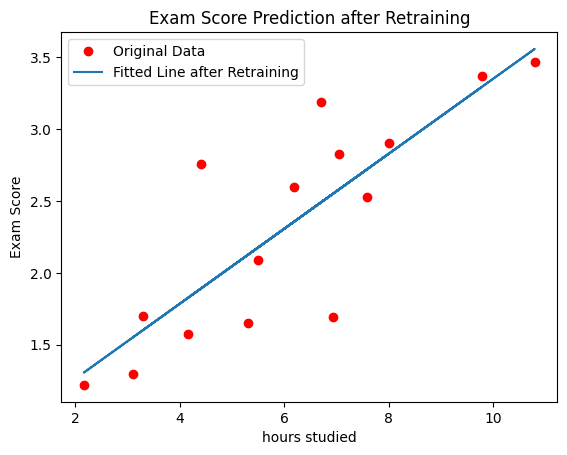

In [106]:
# plotting the retrained model
predicted = model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original Data')
plt.plot(x_train.numpy(), predicted, label='Fitted Line after Retraining')                      
plt.xlabel('hours studied')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Exam Score Prediction after Retraining')
plt.show()
# The code includes data preparation, model training, evaluation, and saving/loading the model. 

In [107]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.2609]])),
             ('linear.bias', tensor([0.7413]))])

# Save model as safetensors file

In [108]:
# Saving the model state_dict to a safetensors file

import torch
from safetensors.torch import save_file
from torchvision import models  # Example model

# # Example model (any nn.Module will do)
# model = models.resnet18(pretrained=False)

# Get the state_dict (contains all model weights)
state_dict = model.state_dict()

# Save to safetensors file
save_file(state_dict, "lr.safetensors")


In [109]:
# Loading the model from a safetensors file


from safetensors.torch import load_file

# Load the safetensors file
model = LinearRegression()
loaded_state_dict = load_file("lr.safetensors")
# Load the state_dict into a new model instance
model.load_state_dict(loaded_state_dict)

# test model

<All keys matched successfully>

In [110]:
# Test the retrained model
test_data = torch.tensor([[4.0], [5.0], [6.0]], dtype=torch.float32)
loaded_model.eval()
with torch.no_grad():
    predictions = loaded_model(test_data)
print("Predictions for test data after retraining:")
for i, test_point in enumerate(test_data):
    print(f"Input: {test_point.item()}, Predicted Output: {predictions[i].item()}")

Predictions for test data after retraining:
Input: 4.0, Predicted Output: 1.7849032878875732
Input: 5.0, Predicted Output: 2.0458130836486816
Input: 6.0, Predicted Output: 2.306723117828369
